<a href="https://colab.research.google.com/github/MUTTA-ISIGI/basic-ml-course/blob/master/Solution_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 4: K-Means & KNN**

Implement everywhere that has `...`

# **1. K-Means**

## 1.1 Re-implement K-Means from scratch

Import packages and libraries


In [41]:
from sklearn.datasets import make_blobs  # for making datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  # for visualization
import numpy as np  # for computation
import random  # for random initialization
import time
from IPython.display import clear_output
import cv2

Making a dataset.

In [42]:
K = 4
X, y = make_blobs(n_samples=1000, n_features=2, centers=K, random_state=32)

Visualize the dataset we just created.

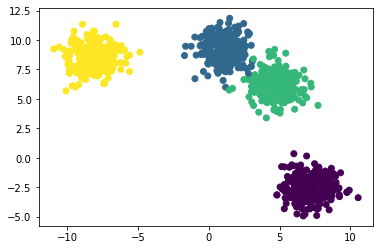

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y)

We implemented centroid random initialization for you. So, you can use it later for tasks.

In [44]:
def init_centroids(X, K):
  rand_indexes = random.choices(range(1000), k=4)
  centroids = X[rand_indexes, :]
  print(rand_indexes)
  return centroids

In [45]:
# for evaluation, we use fixed centroids instead of randomly initialized centroids
fixed_init_centroids = X[[0, 250, 500, 750] , :]

We also implemented a function for visualization that we can use later.

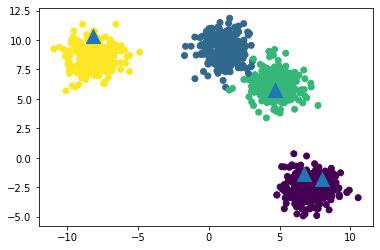

In [46]:
def visualize(X, y, centroids):
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200)
  plt.show();
visualize(X, y, fixed_init_centroids)

Task 1: Calculate Euclidean distance between 2 data points `dp1` and `dp2` **(+1 point)**

In [47]:
dp1 = X[0]
dp2 = X[1]

# write your code below
# you can use np.linalg.norm
distance = np.linalg.norm(dp1 - dp2)
print (distance)
# eval
assert distance == 0.8347885963011235, "Your answer is not correct"

0.8347885963011235


Task 2: Write a function to calculate distances between all data points and centroids **(+1 point)**

In [48]:
# write a function to calculate distance between data points to centroids
def data_centroid_distance(X, centroids):
  distance = np.zeros((X.shape[0], centroids.shape[0])) # in which distance[i, j] is the distance between X[i] and centroids[j]
  # write your code below
  
  for j, centroid in enumerate (centroids):
     distance [: , j] = np.sqrt(np.sum(np.square(X - centroid), axis = 1))
    


  return distance


# evaluate
distance = data_centroid_distance(X, fixed_init_centroids)
assert distance[0, 0] == 0 and distance[250, 1] == 0 and distance[500, 2] == 0 and distance[750, 3] == 0, "Your answer is not correct"

Task 3: Write a function to assign data points to clusters based on distances between data points and centroids **(+1 point)**

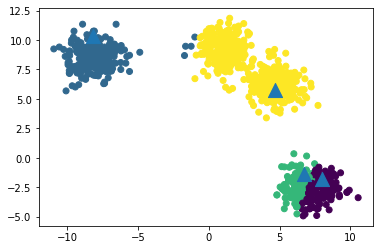

In [49]:
# write a function which assigns data points to clusters
def assign_clusters(X, centroids):
  y = np.zeros((X.shape[0]))
  distance = data_centroid_distance(X, centroids)
  # write your code below
  y = np.argmin (distance, axis = 1)

  return y

# evaluate
assigned_y = assign_clusters(X, fixed_init_centroids)
assert assigned_y[0] == 0 and assigned_y[250] == 1 and assigned_y[500] == 2 and assigned_y[750] == 3, "Your answer is not correct"
visualize(X, assigned_y, fixed_init_centroids)  # check visually to see if the results are reasonable

Task 4: Write a function to re-calculate centroids after data points are assigned **(+1 point)**

In [50]:
def recalculate_centroids(X, y, K):
  centroids = np.zeros((K, X.shape[1]))
  # write your code below
  for i in range (K):
    centroids [i , :] = np.average(X [y == i, :], axis = 0)

  return centroids

Task 5: You are required to combine all elements which you have implemented above to form K-Means. Complete `kmeans` function: **(+2 point)**

Step: 4


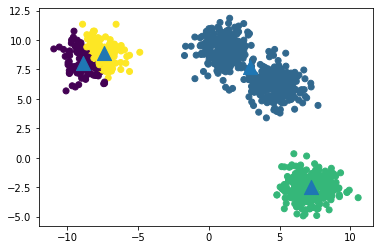

In [51]:
def kmeans(X, K, max_iter=100):
  centroids = init_centroids(X, K)                 # write your code here , centroids should be initialized randomly
  for i in range(max_iter):
    y = assign_clusters(X, centroids)                      # write your code here
    new_centroids =  recalculate_centroids(X, y, K)        # write your code here
    clear_output()
    print(f'Step: {i}')
    visualize(X, y, centroids)
    time.sleep(1)
    if np.array_equal(centroids, new_centroids):
      break
    centroids = new_centroids

# evaluate
kmeans(X, K)

## 1.2 Utilize K-Means for image compression

Each pixel in a regular 24-bit image can represent over 16 million colors. K-Means can be used for image compression where the number of clusters corresponds to the number of colors that need to be used to represent the image. 

Firstly, we will need to download an image and show it.

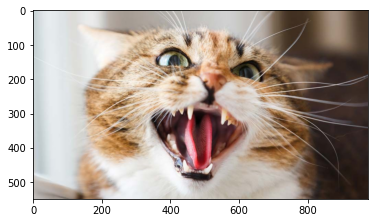

In [52]:
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/41CF/production/_109474861_angrycat-index-getty3-3.jpg -O cat.jpg -q # download image 
original_img = cv2.imread("cat.jpg")[:, :, ::-1]
plt.imshow(original_img)

Task 6: You are required to complete the below function to compress the original image by using only `n_colors` number of colors. The basic idea is to replace all the colors with their corresponding centroid colors. **(+1 point)**

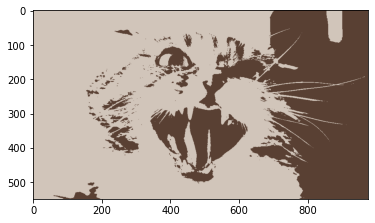

In [53]:
def compress_image(original_img, n_colors=16):
  img = np.reshape(original_img, (-1, 3))
  kmeans = KMeans(n_clusters=n_colors, n_init=1)
  kmeans.fit(img)
  i = range(img.shape[0])
  compressed_img = kmeans.cluster_centers_[kmeans.labels_[i]]  # write your code here
  compressed_img = np.reshape(compressed_img, original_img.shape).astype('uint8')
  plt.imshow(compressed_img)

# evaluate
compress_image(original_img, n_colors=2)

Run image compression with K = 128. It's hard to notice the difference even when we reduce the number of colors from 16 million to 128.

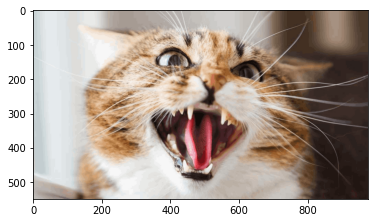

In [54]:
compress_image(original_img, n_colors=128)

# **2. K-Nearest Neighbors**

Import things

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

We use the iris dataset which we are already familiar with.

In [56]:
data = load_iris()
X = data.data
y = data.target

Divide the whole dataset into train set and test set.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

Task 7: You are required to re-implement KNN from scratch by completing `KNN_predict` function. **(+2 points)**

In [67]:
def KNN_predict(X_train, y_train, x_test, K):
  '''
  Evaluate the classification for `x_test` with K-nearest 
  neighbor given training set (X_train, y_train).
    
  Input:
    X_train: features of training set
    y_train: labels of training set
    x_test : features of test data point
    K      : number of nearest neighbors
  Output:
    Classification of the input data point.
  '''
  # write your code below

  distance = np.sqrt(np.sum(np.square(X_train - x_test), axis = 1))
  neighbours = y[np.argpartition(distance,K) [: K]]
  values, counts = np.unique (neighbours , return_counts = True)
  prediction = values [np.argmax(counts)]
  return prediction

y_scratch_predict = np.zeros(y_test.shape)
for i, x_test in enumerate(X_test):
   y_scratch_predict[i] = KNN_predict(X_train, y_train, x_test, 3)
cls = KNeighborsClassifier(n_neighbors=3, weights='uniform')
cls.fit(X_train, y_train)
y_sklearn_pred = cls.predict(X_test)
match = accuracy_score(y_scratch_predict, y_sklearn_pred)
assert match == 1.0, 'Your answer is not correct'

AssertionError: ignored

Task 8: Tunning hyperparameters to achieve 1.0 accuracy **(+1 points)**

In [78]:
# write your code below
#for i in range (1,12):
K = 11
weights = "uniform"

cls = KNeighborsClassifier(n_neighbors=K, weights=weights)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

assert acc == 1.0, 'Your answer is not correct'

Accuracy:  1.0
